<center>
<img src="../../img/ml_theme.png">
# Майнор "Интеллектуальный анализ данных" 
# Курс "Введение в анализ данных"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель ФКН НИУ ВШЭ Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="http://www.microsoft.com/en-us/openness/default.aspx#Ms-RL">Ms-RL</a>. Можно использовать в любых целях, но с обязательным упоминанием автора курса и аффилиации.

# <center> Семинар 2. Python для анализа данных. Средства визуализации. Pandas, Matplotlib, Seaborn.
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

In [1]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
%pylab inline
import pandas as pd
import sys
sys.path.append('../../scripts/') 
from scipy.stats import ttest_ind
from yandex_mipt_stat_tests import * # стат. тесты - дополнительно

Populating the interactive namespace from numpy and matplotlib


В качестве дополнительного задания будет проверка статистических гипотез. Реализация Z-критерия: tribute to YDF & MIPT ([специализация](https://www.coursera.org/specializations/machine-learning-data-analysis) "Машинное обучение и анализ данных").

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [2]:
data = pd.read_csv('../../data/titanic_train.csv',
                  index_col='PassengerId')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [4]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Возьмем первые 10 элементов столбца Parch - количество родителей и детей пассажира на борту:**

In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data['Fare'][:10]

PassengerId
1      7.2500
2     71.2833
3      7.9250
4     53.1000
5      8.0500
6      8.4583
7     51.8625
8     21.0750
9     11.1333
10    30.0708
Name: Fare, dtype: float64

**Отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br />
Если нет - посмотрите, как вычисляется выражение в квадратных в скобках.

In [13]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C


In [6]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort(columns='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Примеры создания признаков**

In [7]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [8]:
age_categories = [age_category(age) for age in data.Age]

In [9]:
data['Age_category'] = age_categories

In [10]:
data['Num_rel_friens'] = data['Parch'] + data['SibSp']

In [14]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category,Num_rel_friens
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,0


In [15]:
pd.crosstab(data['Sex'], data['Pclass'])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


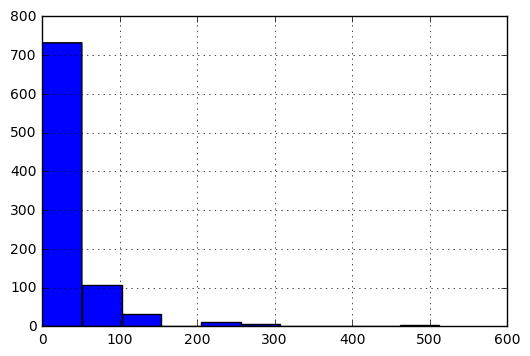

In [16]:
data['Fare'].hist()

**1. Сколько мужчин / жещин находилось на борту?**

In [13]:
# Ваш код здесь

**2. Выведите распределение переменной Pclass (социально-экономический статус). Дополнительно - это же распределение только для мужчин / женщин.**


In [14]:
# Ваш код здесь

**3. Сколько в среднем заплатил один пассажир? Найдите стандартное отклонение этой величины. Лучше округлить до 2 десятичных знаков.**

In [15]:
# Ваш код здесь

**4. Правда ли, что молодые выживали чаще (с большей вероятностью), чем старики? Пусть "молодые" - те, кто моложе 30, а "старики" - те, кто старше 60. Дополнительно: проверить, действительно ли молодые выживают чаще, с помощью Z-критерия для разности долей в независимых выборках (proportions_diff_z_test из ../../scripts/yandex_mipt_stat_tests.py)**

In [16]:
# Ваш код здесь

**5. Правда ли, что женщины выживали чаще мужчин? Дополнительно: проверить, действительно ли женщины выживают чаще, с помощью Z-критерия для разности долей в независимых выборках.**

In [17]:
# Ваш код здесь

**6. Какое самое популярное имя среди пассажиров Титаника мужского пола?**

In [18]:
# Ваш код здесь

**7. Сравните распределение стоимости билетов у спасенных и у погибших. Дополнительно: проверить равенство средних стоимостей билетов спасенных и погибших с помощью t-теста Стьюдента.**

In [19]:
# Ваш код здесь

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания?**

In [20]:
# Ваш код здесь